In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report,precision_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.cluster import KMeans

### Reading and Underestanding Data

In [3]:
#Loading CSV file
df = pd.read_csv("bank.csv")

In [4]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8979,36,admin.,single,secondary,no,10041,yes,no,cellular,20,nov,91,2,184,1,other,no
4418,58,services,married,primary,no,2946,yes,no,cellular,14,may,467,1,-1,0,unknown,yes
9425,31,technician,married,secondary,no,4,no,no,unknown,20,may,199,4,-1,0,unknown,no
5088,40,management,married,tertiary,no,0,yes,no,cellular,25,mar,506,2,-1,0,unknown,yes
2380,52,technician,married,secondary,no,137,no,no,cellular,6,jul,227,2,-1,0,unknown,yes
3459,61,retired,married,secondary,no,1058,no,no,cellular,27,apr,159,3,-1,0,unknown,yes
8177,48,blue-collar,married,primary,no,343,no,no,unknown,19,jun,136,1,-1,0,unknown,no
2302,51,self-employed,married,unknown,no,2094,no,no,cellular,8,jun,458,6,-1,0,unknown,yes
10801,28,admin.,single,tertiary,no,373,yes,no,cellular,4,feb,126,1,-1,0,unknown,no
10202,55,management,single,tertiary,no,1498,no,no,cellular,25,aug,340,5,-1,0,unknown,no


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### Count of each category

In [7]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [8]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [9]:
df['marital'].value_counts().tolist()

[6351, 3518, 1293]

In [10]:
df.groupby(['deposit']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
deposit,,,,,,,,,,,,,,,,
no,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873,5873
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [11]:
#Check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
#Count of unique values
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [13]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [14]:
#Dropping previous outcome
df.drop('poutcome',axis=1,inplace=True)

### Data Visualization

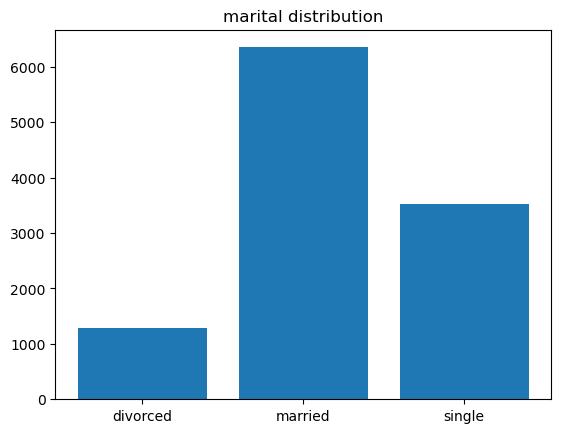

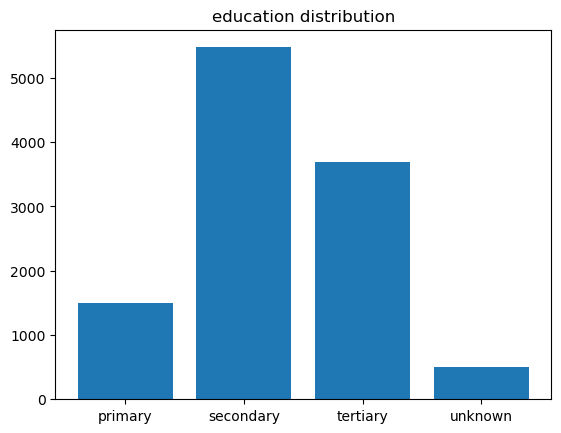

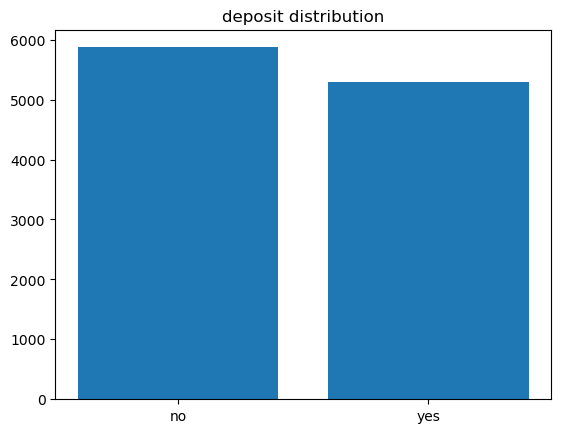

In [15]:
# Data distribution for columns
for col in ['marital','education', 'deposit']:
    ds = df.groupby([col])['age'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

##### Since the deposit distribution has a good balance, there is no need for MICE imputation technique

#### Graph Inference:
    From the graph, it is evident that most of the customers of the bank are married and have secondary education.

<Axes: xlabel='count', ylabel='job'>

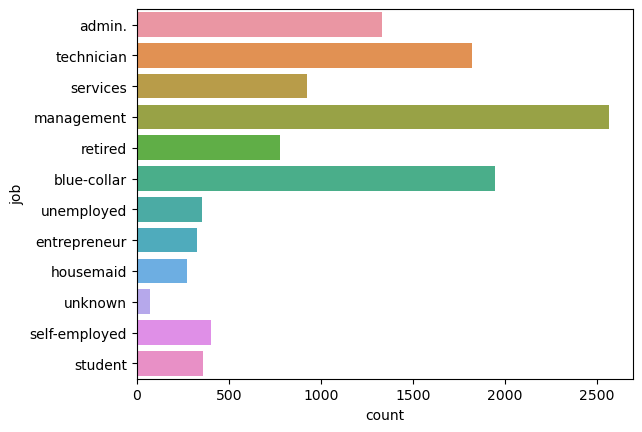

In [16]:
sns.countplot(y='job',data=df)

#### Graph Inference:
    The above graph, it is evident that majority of the customers are high positioned employees.

#### Variation of deposit column on other categorical variable

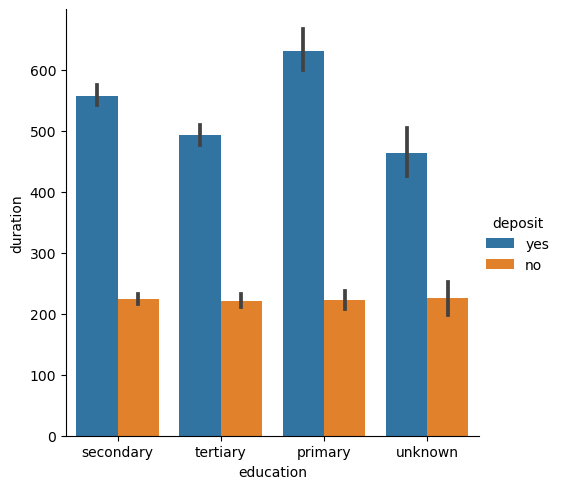

In [17]:
sns.catplot(x="education", y="duration",hue="deposit",
                data=df, kind="bar");

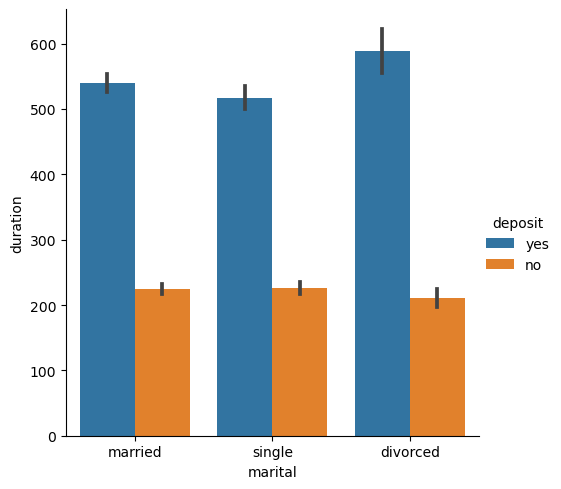

In [18]:
sns.catplot(x="marital", y="duration",hue="deposit",
                data=df, kind="bar");

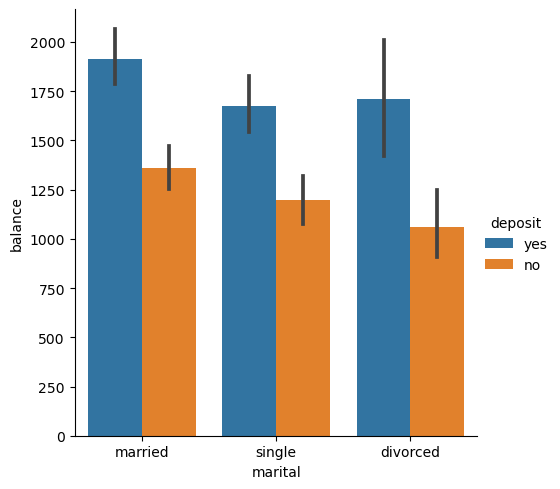

In [19]:
sns.catplot(x="marital", y="balance",hue="deposit",
                data=df, kind="bar");

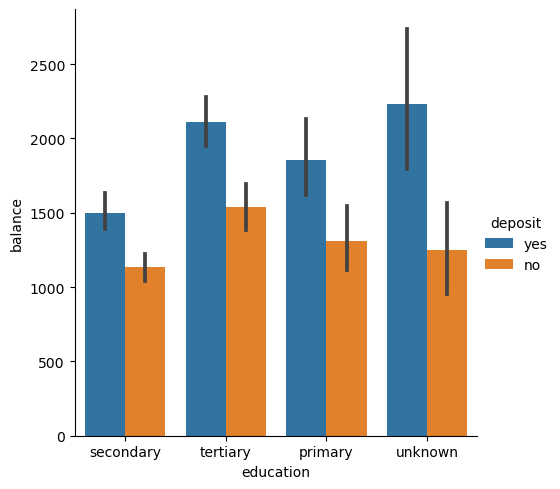

In [20]:
sns.catplot(x="education", y="balance",hue="deposit",
                data=df, kind="bar");

<Axes: title={'center': 'Job and deposit'}>

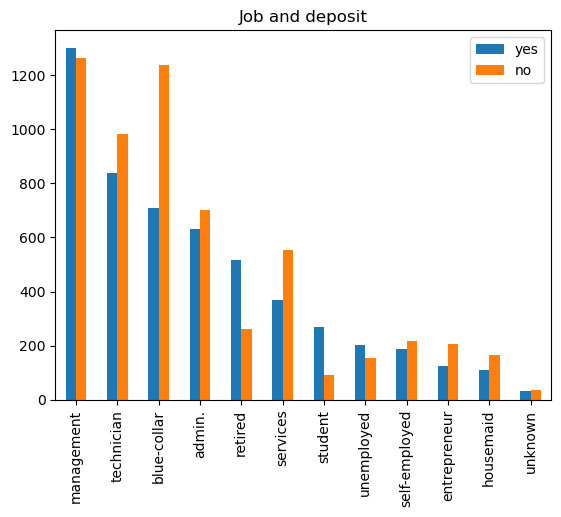

In [21]:
#job and deposit
data = pd.DataFrame()

data['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
data['no'] = df[df['deposit'] == 'no']['job'].value_counts()

data.plot.bar(title = 'Job and deposit')

#### Graph Inference:
- Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
- Married customers are less likely to subscribe for term deposit.
- People who subscribed for term deposit tend to have greater balance and age values.
- People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

### Label encoding

We are manually encoding the categorical values for month and education as these features should be in a sequence according to its hierarchy

In [22]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
df['month'].value_counts().tolist()

[2824, 1519, 1514, 1222, 943, 923, 776, 392, 344, 319, 276, 110]

In [24]:
#Encoding months
d={"may":5,"jun":6,"jul":7,"aug":8,"oct":10,"nov":11,"dec":12,"jan":1,"feb":2,"mar":3,"apr":4,"sep":9}
df['month']=df['month'].map(d)

In [25]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
359,27,blue-collar,married,primary,no,-413,no,yes,unknown,27,6,422,6,-1,0,yes
10331,51,management,married,tertiary,no,385,no,no,cellular,11,8,39,2,-1,0,no
299,36,services,married,secondary,no,981,no,no,unknown,16,6,1093,1,-1,0,yes
10931,58,admin.,married,primary,no,879,yes,no,unknown,16,5,242,7,-1,0,no
6828,59,retired,married,secondary,no,136,no,no,cellular,6,8,301,4,-1,0,no
4214,33,management,single,tertiary,no,87,no,no,cellular,12,8,978,1,-1,0,yes
6468,47,housemaid,divorced,primary,no,1405,no,no,unknown,12,6,127,1,-1,0,no
6443,35,management,married,tertiary,no,0,yes,yes,cellular,25,7,86,4,-1,0,no
3525,34,admin.,married,secondary,no,920,no,no,cellular,14,5,526,3,179,3,yes
6615,48,technician,divorced,tertiary,no,83,no,yes,cellular,19,8,243,6,-1,0,no


In [26]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [27]:
#Encoding education
d={"secondary":2,"tertiary":3,"primary":1,"unknown":np.nan}
df['education']=df['education'].map(d)

In [28]:
#There are 497 unknown values in education column
df['education'].isnull().sum()

497

In [29]:
#Imputing 'Unknown' values in education with mode values
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [30]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
2712,37,admin.,single,3.0,no,1000,yes,no,cellular,22,9,239,1,99,2,yes
5662,41,management,married,3.0,no,1897,yes,no,unknown,19,5,335,3,-1,0,no
6760,35,blue-collar,married,1.0,no,0,yes,no,cellular,8,5,265,1,290,2,no
6443,35,management,married,3.0,no,0,yes,yes,cellular,25,7,86,4,-1,0,no
3170,35,management,married,3.0,no,62,no,no,cellular,8,2,469,2,185,2,yes
553,45,admin.,married,2.0,no,524,yes,no,cellular,23,7,808,1,-1,0,yes
9962,52,retired,married,2.0,no,603,no,yes,unknown,9,6,79,1,-1,0,no
8260,34,admin.,married,2.0,no,641,yes,yes,unknown,16,5,467,1,-1,0,no
6627,55,blue-collar,married,2.0,no,2059,yes,no,cellular,11,5,149,1,259,4,no
4350,36,technician,single,2.0,no,12264,no,no,cellular,12,4,158,2,-1,0,yes


In [31]:
#Performing label encoding
for col in df.columns:
    if df[col].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[col].values))
        df[col] = lbl.transform(list(df[col].values))

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,2.0,0,2343,1,0,2,5,5,1042,1,-1,0,1
1,56,0,1,2.0,0,45,0,0,2,5,5,1467,1,-1,0,1
2,41,9,1,2.0,0,1270,1,0,2,5,5,1389,1,-1,0,1
3,55,7,1,2.0,0,2476,1,0,2,5,5,579,1,-1,0,1
4,54,0,1,3.0,0,184,0,0,2,5,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,1.0,0,1,1,0,0,20,4,257,1,-1,0,0
11158,39,7,1,2.0,0,733,0,0,2,16,6,83,4,-1,0,0
11159,32,9,2,2.0,0,29,0,0,0,19,8,156,2,-1,0,0
11160,43,9,1,2.0,0,0,0,1,0,8,5,9,2,172,5,0


### Heat map

We are plotting a heat map to underestand the correlation between every features with each other

<Axes: >

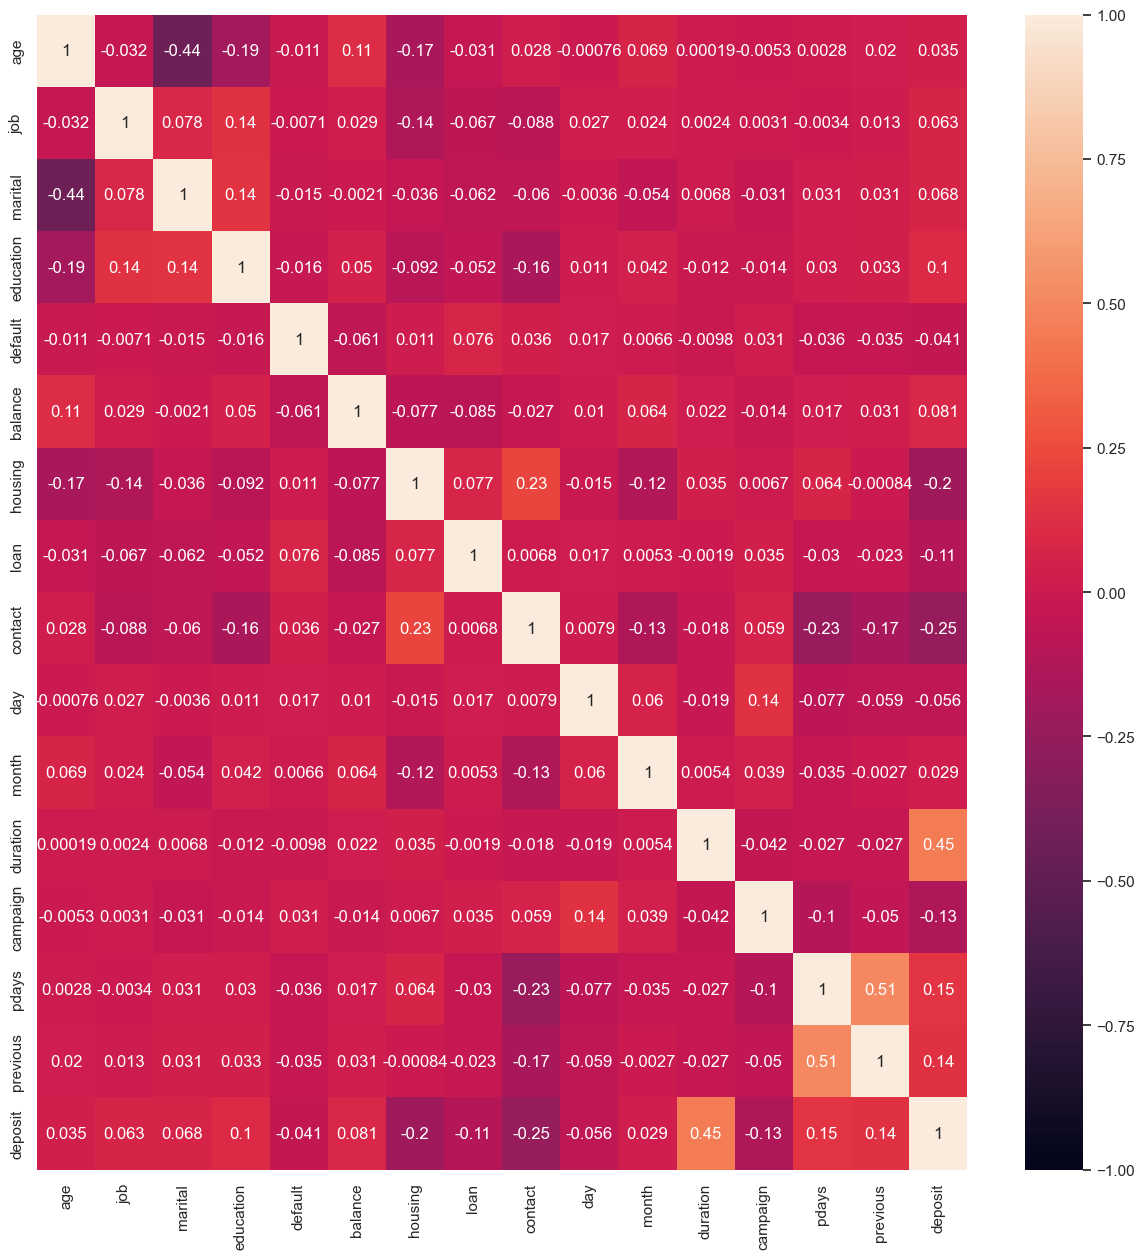

In [33]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1)

##### we are able to see a decent correlation between the duration column and the target variable. There are high possibility that the duration of the call with the customer impact the outcome

### Train-Test Splitting

In [34]:
# Set X and y
target=df['deposit']
df.drop('deposit',axis=1,inplace=True)

In [35]:
y = target
X = df

In [36]:
# Splitting the data in 70% for train and 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Scaling data

We scaled data to transform data so that it fits within scale. This improves the performance of the model

In [37]:
std_model=StandardScaler()
x_train_std_features=std_model.fit_transform(X_train)
x_test_std_features=std_model.transform(X_test)
print(x_train_std_features.shape)
print(x_test_std_features.shape)

(7813, 15)
(3349, 15)


## Classification Models

In [38]:
#Function to print predicted value and confusion matrix
def model_prediction(model):
    y_train_preds = model.predict(x_train_std_features)
    y_test_preds = model.predict(x_test_std_features)

    print("Accuracy score : {:.2f}".format(accuracy_score(y_test_preds,y_test)))
    print("Recall score : {:.2f}".format(recall_score(y_test_preds,y_test,average='macro',zero_division=True)))
    print("Precision score : {:.2f}".format(precision_score(y_test_preds,y_test,zero_division = True)))
    print("F1 score : {:.2f}".format(f1_score(y_test_preds,y_test,zero_division=True)))
    confusion_matrix_display(y_test,y_test_preds)

In [39]:
#Function to print confusion matrix
def confusion_matrix_display(y_test,y_test_preds):
    model_cm = confusion_matrix(y_test,y_test_preds)
    dis = ConfusionMatrixDisplay(model_cm,display_labels=["Subscribe for term deposit","Not subscribe for term deposit"])
    dis.plot(cmap=plt.cm.cividis_r,values_format='g')
    plt.show()

#### Logestic Regression

Accuracy score : 0.79
Recall score : 0.79
Precision score : 0.75
F1 score : 0.78


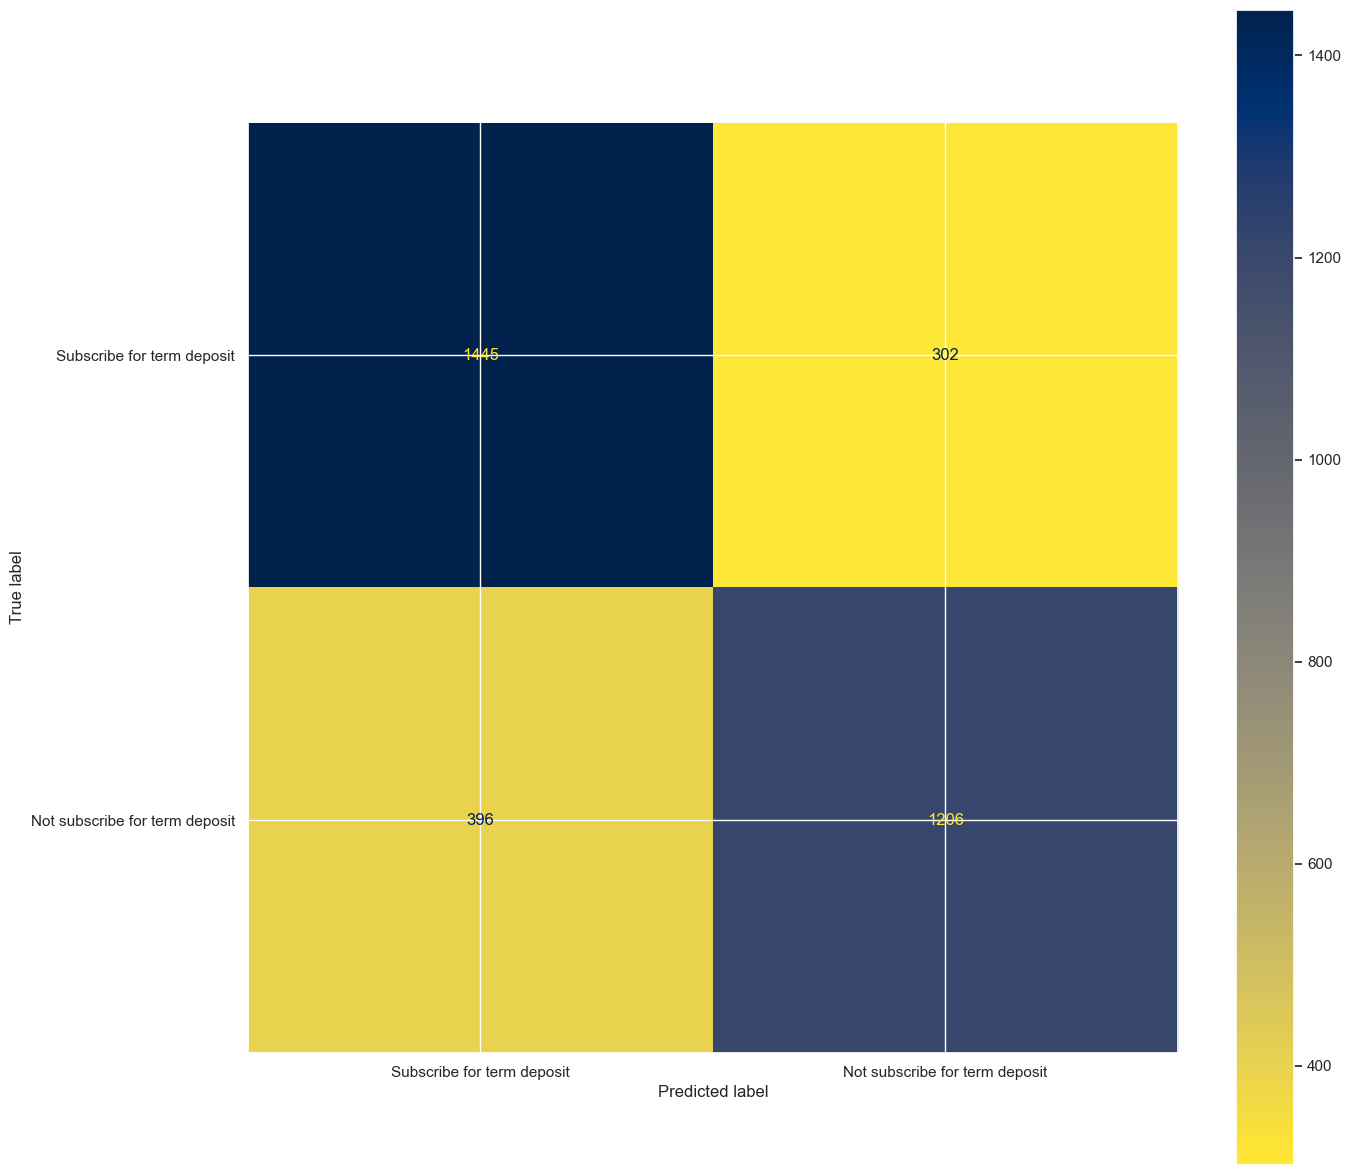

In [40]:
model_lr=LogisticRegression()
model_lr.fit(x_train_std_features,y_train)
model_prediction(model_lr)

###### Logestic Regression gives an accuracy of 79%.

#### Decision Tree Classifier

Accuracy score : 0.80
Recall score : 0.80
Precision score : 0.78
F1 score : 0.79


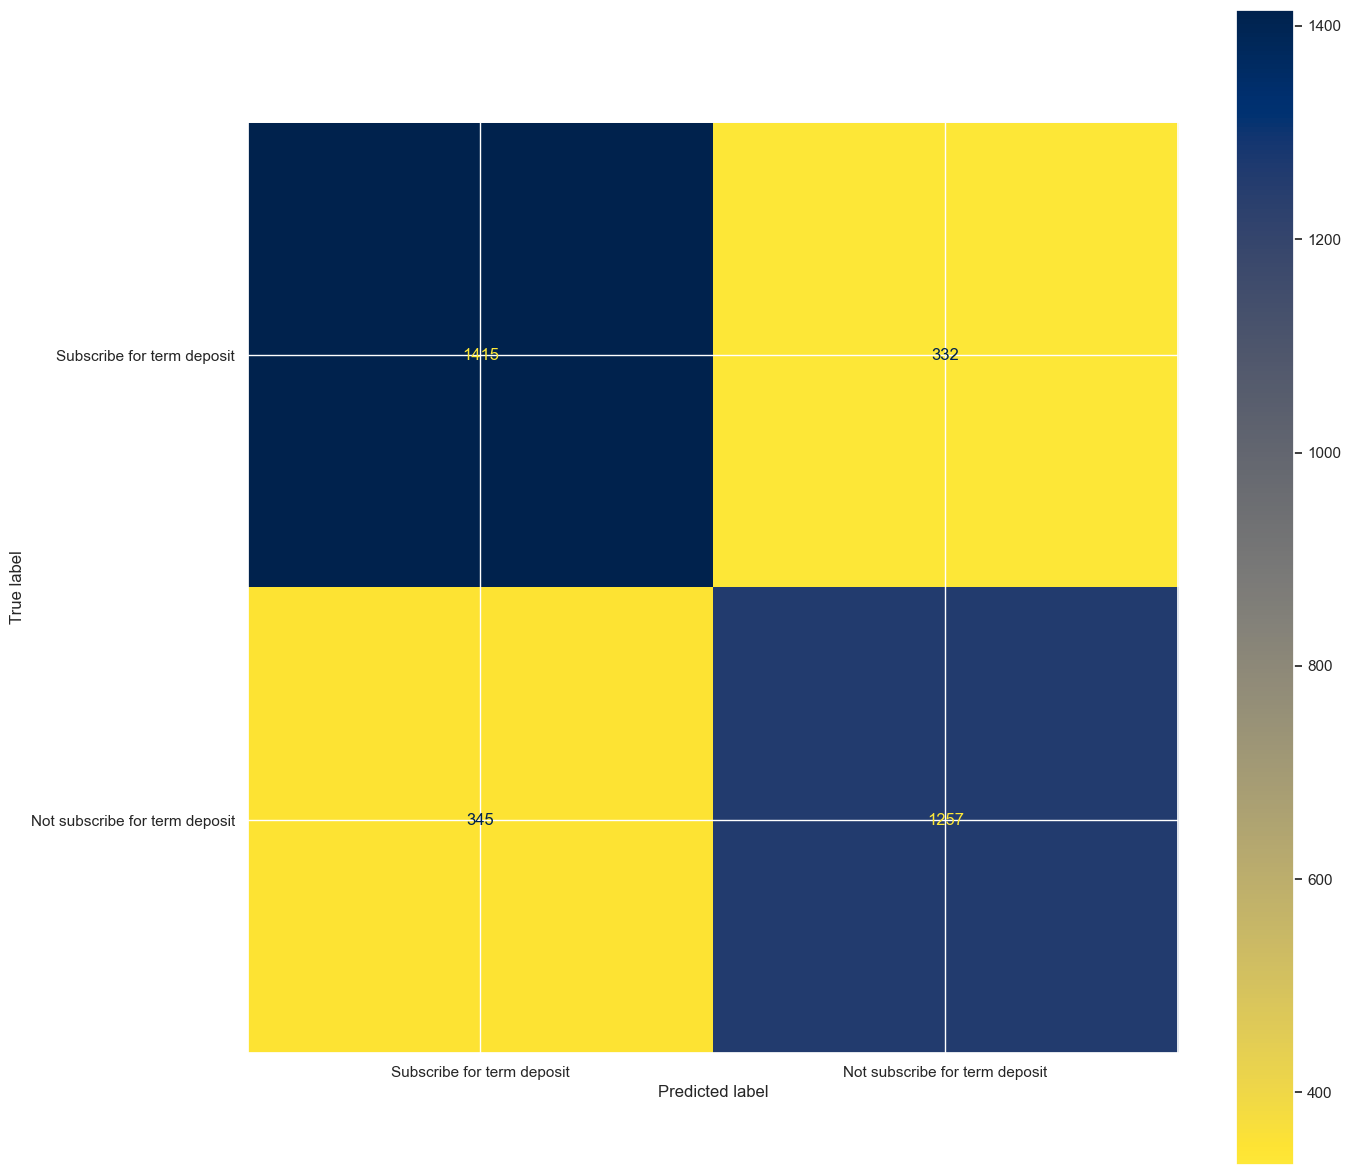

In [41]:
model_dtree=DecisionTreeClassifier()
model_dtree.fit(x_train_std_features, y_train)
model_prediction(model_dtree)

###### Decision Tree gives an accuracy of 80%. 

#### Random Forest Classifier

Accuracy score : 0.83
Recall score : 0.83
Precision score : 0.81
F1 score : 0.82


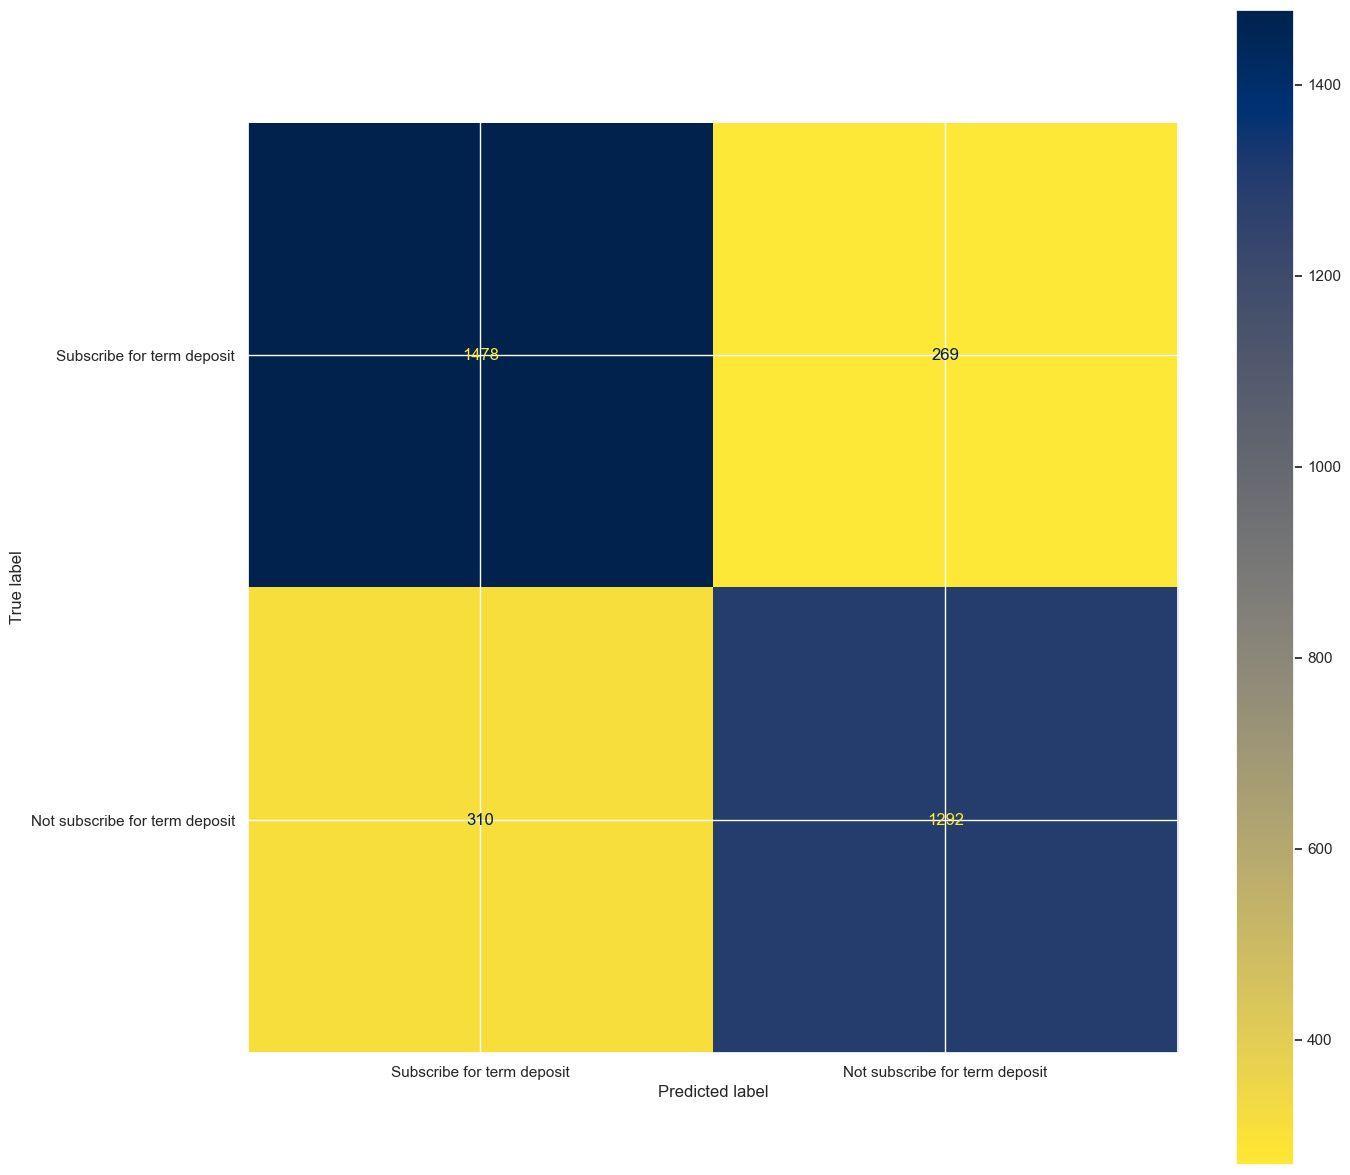

In [42]:
model_rf= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model_rf.fit(x_train_std_features, y_train)
model_prediction(model_rf)

###### Random Forest classifier gives an accuracy of 82%. 

#### XG Boost Classifier

Accuracy score : 0.85
Recall score : 0.86
Precision score : 0.88
F1 score : 0.85


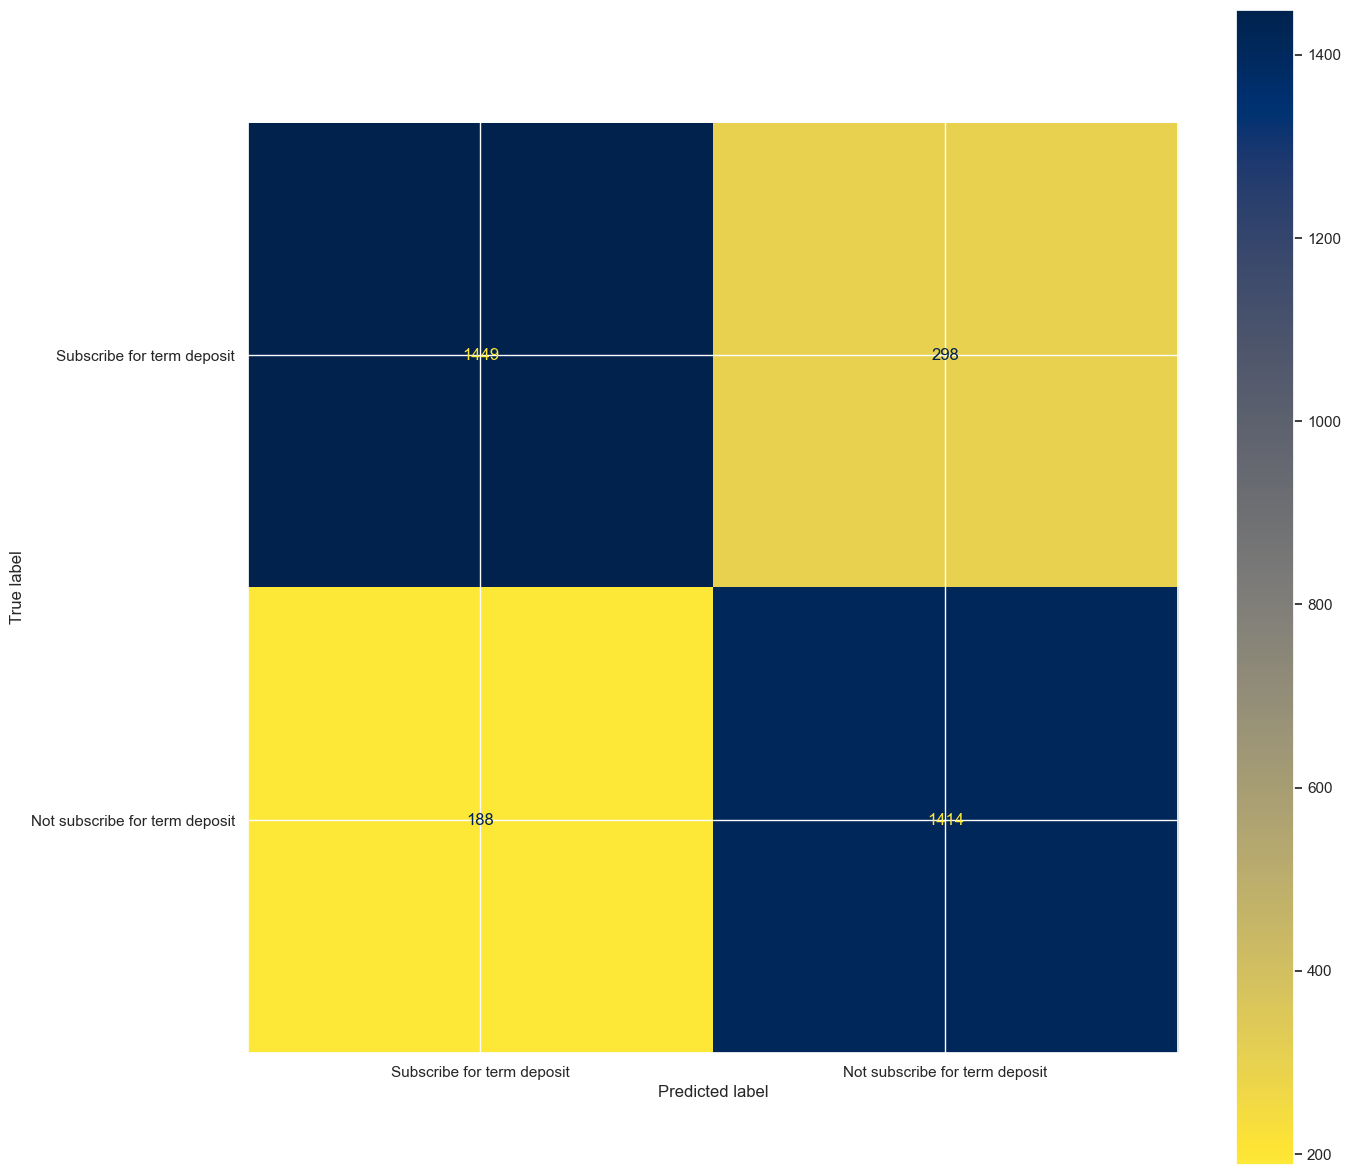

In [43]:
#model = xgb.XGBClassifier()
model_xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
model_xgb.fit(x_train_std_features,y_train.squeeze().values)

model_prediction(model_xgb)

##### XG Boost gives an accuracy of 85%.

# Hyper parameter tuning on the best model

In [47]:

parameters = {
    'max_depth': range (5, 12, 1),
    'n_estimators': range(50, 301, 50),
    'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.2],
    'subsample' : [0.6,0.7,0.8,0.9,1]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits
Accuracy score : 0.86
Recall score : 0.86
Precision score : 0.88
F1 score : 0.86


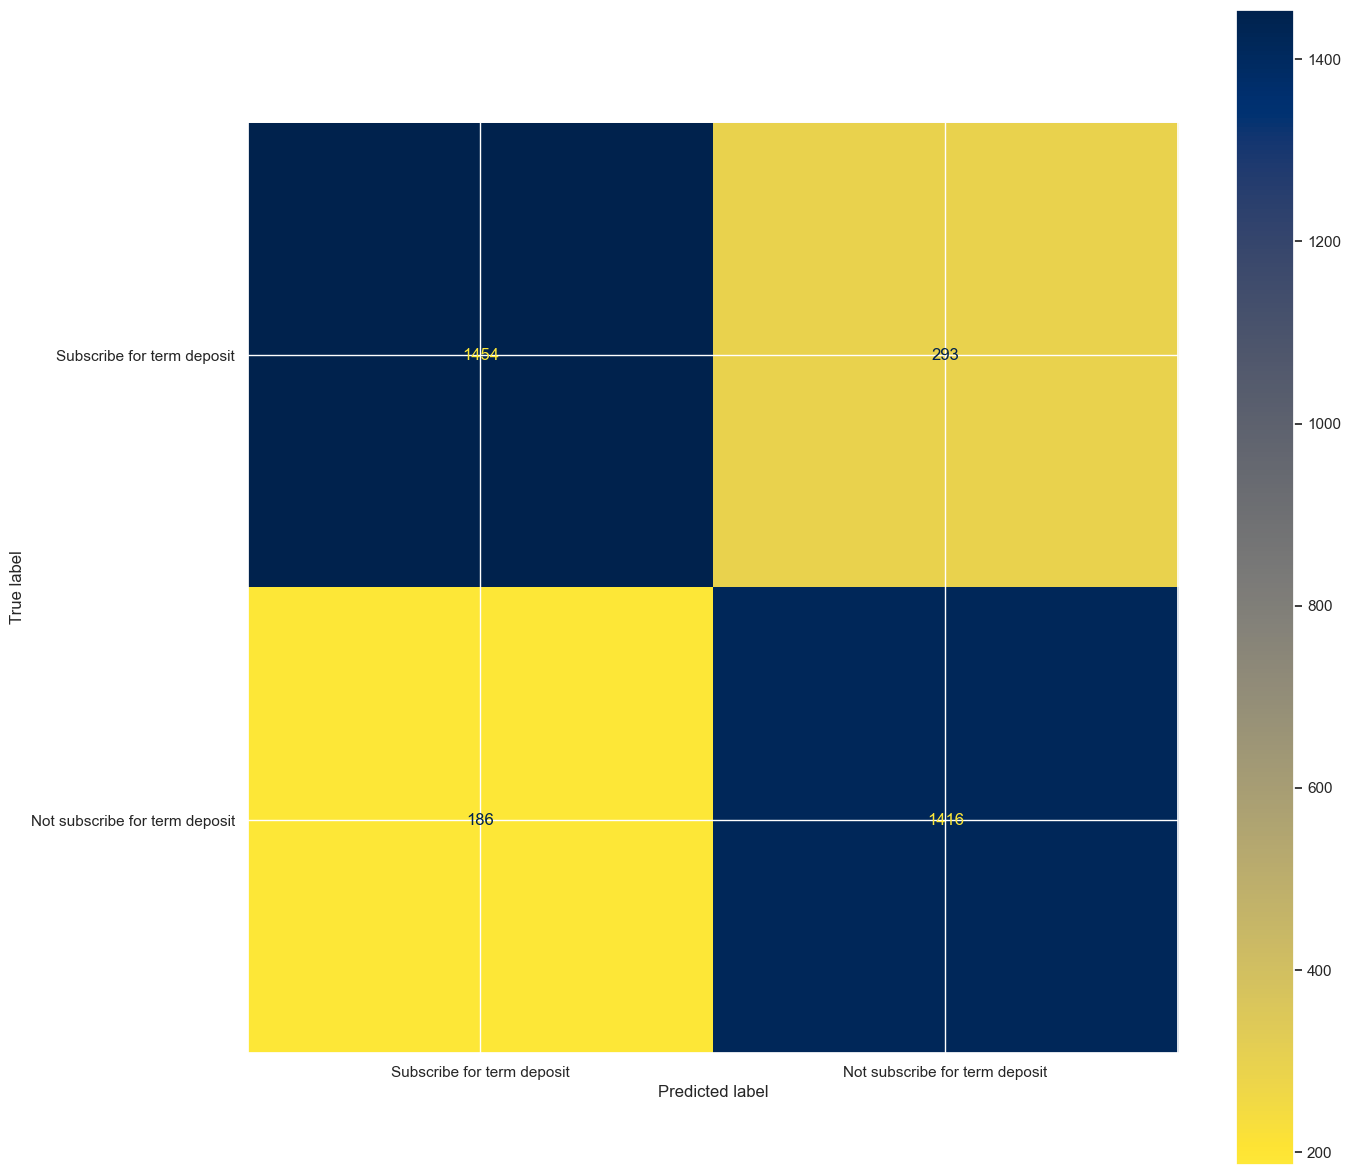

In [48]:
grid_search.fit(x_train_std_features,y_train.squeeze().values)

model_prediction(grid_search)

##### After all the tuning we are able to push our accuracy score to 86%

### Model Comparison

In [49]:
model_comparison_df = pd.DataFrame()
model_comparison_df['Model Names'] = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBoost'
                                      ,'XGBoost(After hyper parameter tuning)']
model_comparison_df['Accuracy Score'] = [0.79,0.80,0.82,0.85,0.86]
model_comparison_df['Precision Score'] = [0.75,0.79,0.80,0.88,0.88]
model_comparison_df['Recall Score'] = [0.79,0.80,0.82,0.86,0.86]
model_comparison_df

,Model Names,Accuracy Score,Precision Score,Recall Score
0,LogisticRegression,0.79,0.75,0.79
1,DecisionTreeClassifier,0.80,0.79,0.80
2,RandomForestClassifier,0.82,0.80,0.82
3,XGBoost,0.85,0.88,0.86
4,XGBoost(After hyper parameter tuning),0.86,0.88,0.86


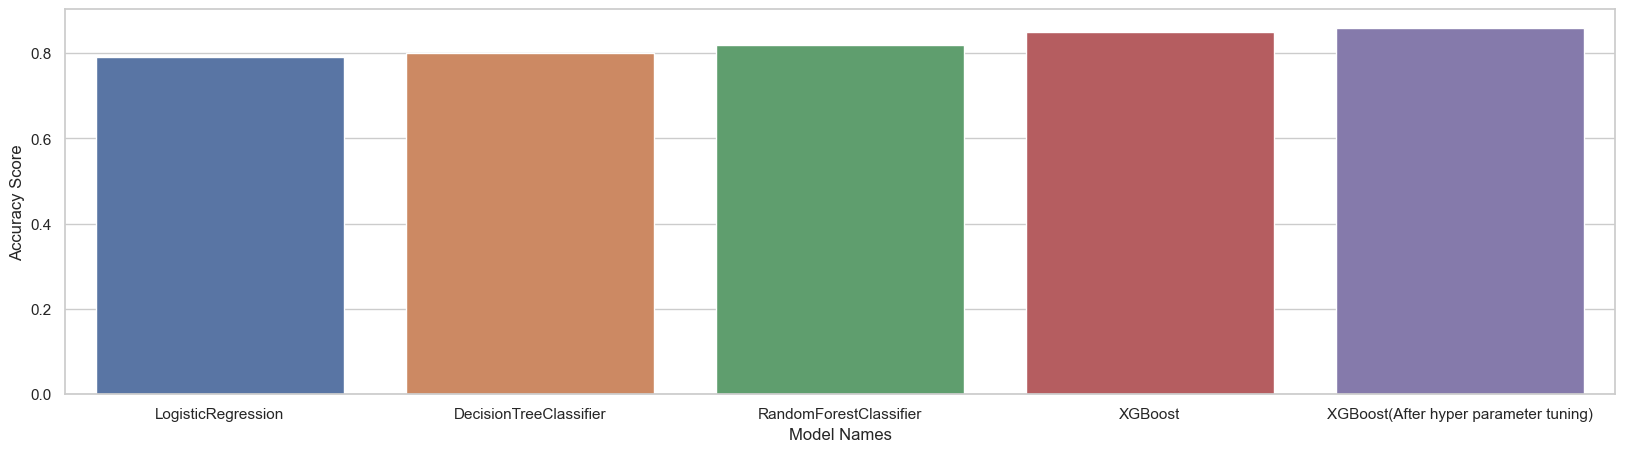

In [51]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(y ='Accuracy Score',x = 'Model Names',data = model_comparison_df)

### Classification Report of the best model

In [52]:
y_predicted_xgb = grid_search.predict(x_test_std_features)
report_xgboost = classification_report(y_test,y_predicted_xgb)
print(report_xgboost)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1747
           1       0.83      0.88      0.86      1602

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



#### AUC - ROC curve

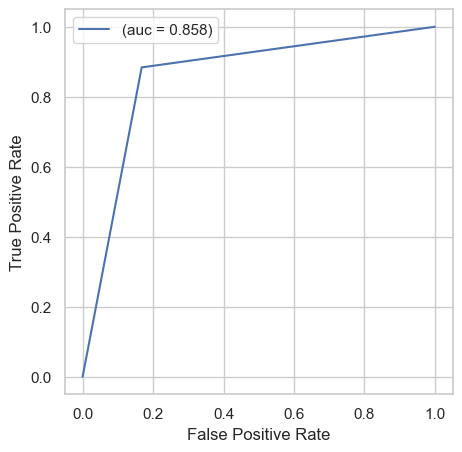

In [53]:
roc_auc_score(y_test,y_predicted_xgb)
fpr,tpr,threshold =roc_curve(y_test,y_predicted_xgb)
auc = auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Classification Inferences:
- It is clear that XG Boost (after hyper parameter tuning) performs well on the dataset with an accuracy of 86% compared to all other classification models.

## Clustering for segmentation

### Preprossesing data for clustering

For segmentation, we chose only main attributes like age, job, marital status, education and account balance. To make the clustering easier, we chose non-negative balance and dropped the duplicates

In [54]:
segment_df = df.iloc[:,:6]
segment_df = segment_df.drop(columns='default')
segment_df = segment_df[segment_df['balance'] > 0]
segment_df = segment_df.drop_duplicates()
segment_df.head()

,age,job,marital,education,balance
0,59,0,1,2.0,2343
1,56,0,1,2.0,45
2,41,9,1,2.0,1270
3,55,7,1,2.0,2476
4,54,0,1,3.0,184


C:\Users\Benson\AppData\Local\Temp\ipykernel_25224\687794333.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df['age'], ax=ax1)
C:\Users\Benson\AppData\Local\Temp\ipykernel_25224\687794333.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df['balance'], ax=ax2)


<Axes: xlabel='balance', ylabel='Density'>

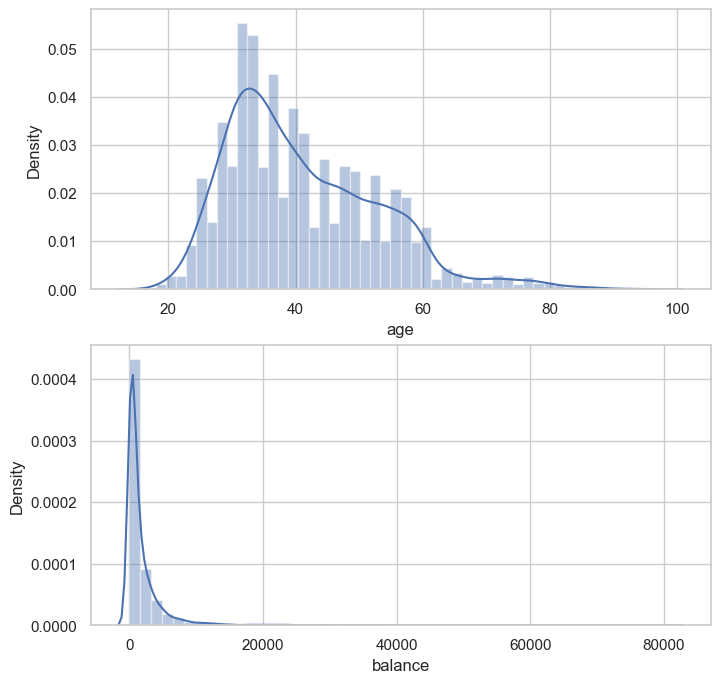

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.distplot(segment_df['age'], ax=ax1)
sns.distplot(segment_df['balance'], ax=ax2)

Since our distributions are right-skewed, we perform a log transofrmation.A log transformation will reduce skewness.

In [56]:
#Grouping categorical and continues data
contData = []
categoricalData = []

for c in segment_df.columns:
    if segment_df[c].dtype == 'int64':
        contData += [c]
    else:
        categoricalData += [c]
segment_df[categoricalData].nunique()

job          12
marital       3
education     3
dtype: int64

Assuming the data is normally distributed, we performed the log transformation and we got a normalized result after the process.

C:\Users\Benson\AppData\Local\Temp\ipykernel_25224\3497406883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df['age'], ax=ax1)
C:\Users\Benson\AppData\Local\Temp\ipykernel_25224\3497406883.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df['balance'], ax=ax2)


<Axes: xlabel='balance', ylabel='Density'>

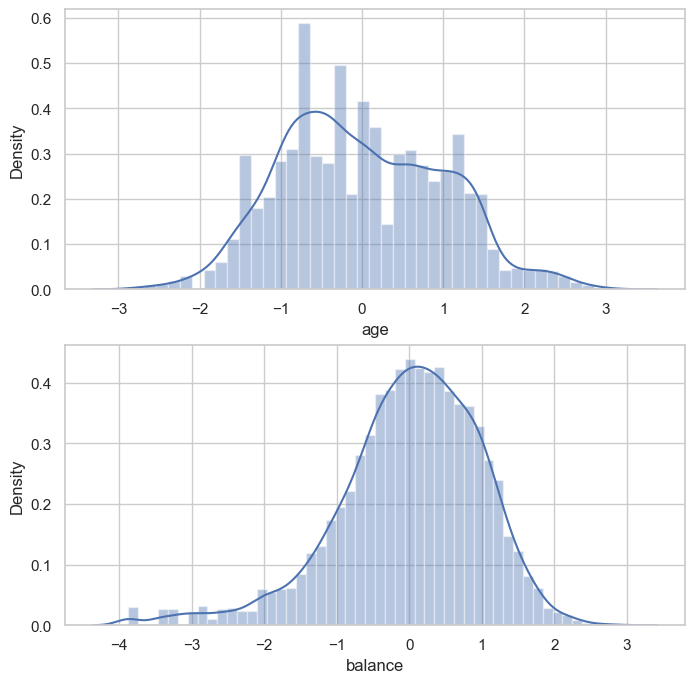

In [57]:
segment_df[contData] = np.log(segment_df[contData])
scaler = StandardScaler()
segment_df[contData] = scaler.fit_transform(segment_df[contData])
segment_df[contData] = scaler.fit_transform(segment_df[contData])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.distplot(segment_df['age'], ax=ax1)
sns.distplot(segment_df['balance'], ax=ax2)

Since we are already working on a scaled and encoded data, lets model the input.

### KMeans Clustering

#### Choosing number of clusters to divide the data
     We will run kMeans 10 times from 1 to 10 and and store the result to check the number of clusters required.

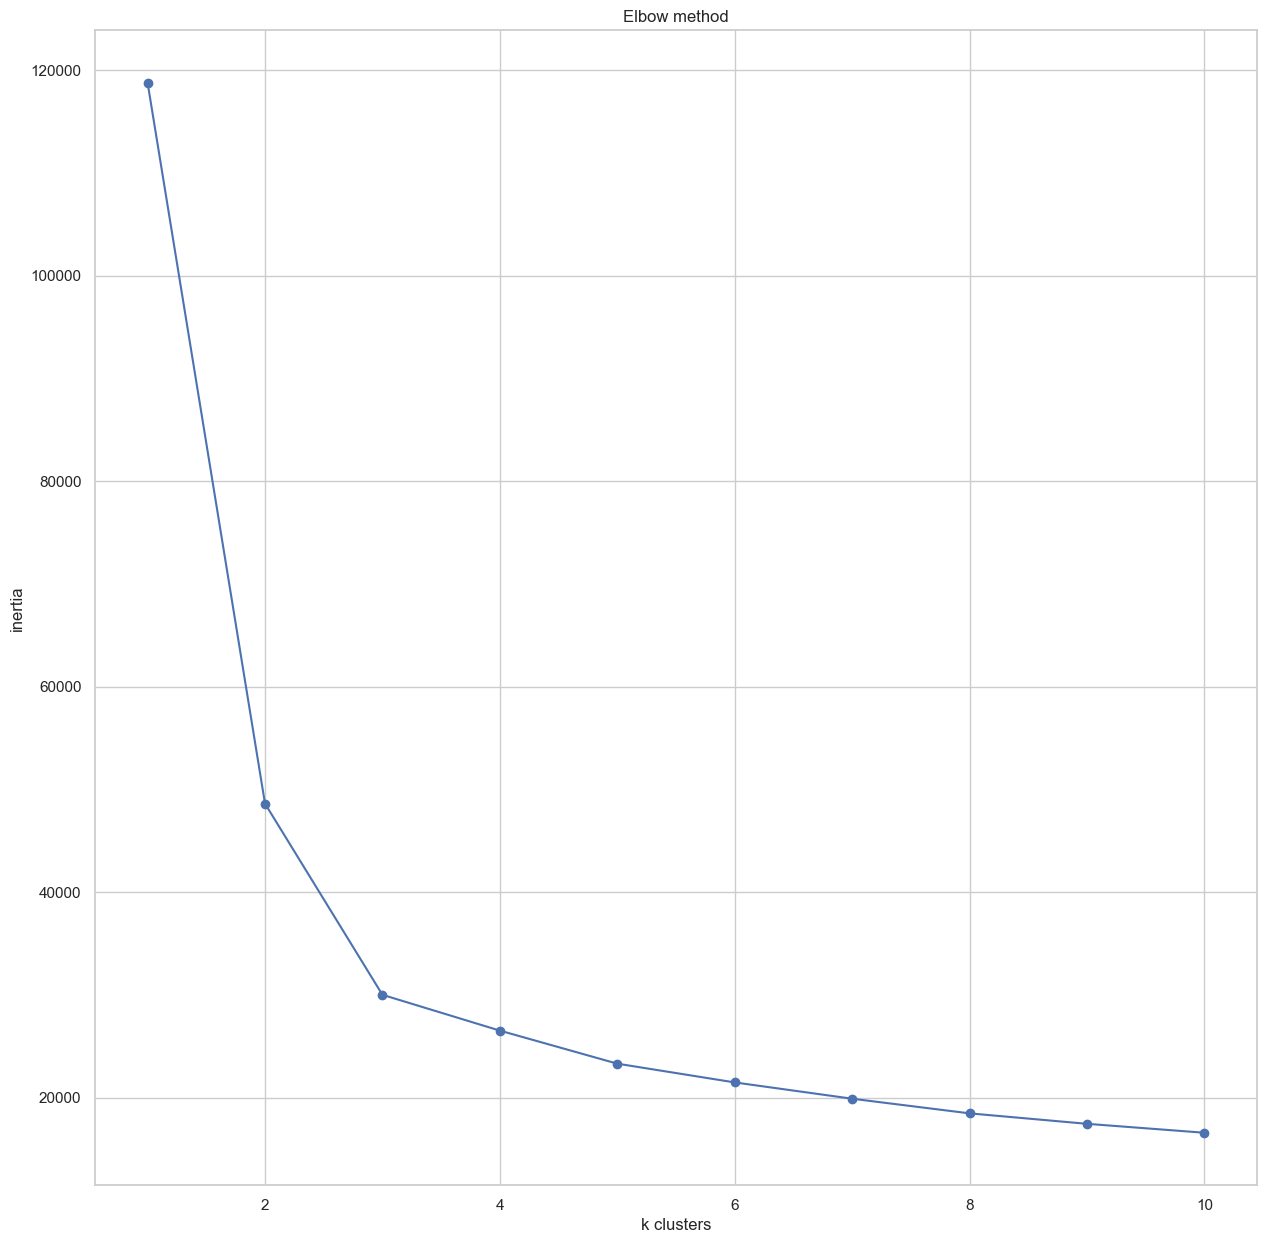

In [58]:
allFeature_df = segment_df.copy()
inert = []

for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=10, max_iter=10)
    kmeans.fit(allFeature_df)
    clusters = kmeans.predict(allFeature_df)
    inert.append(kmeans.inertia_)
    
plt.plot(range(1,11), inert, marker='o')
plt.title('Elbow method')
plt.xlabel('k clusters')
plt.ylabel('inertia')
plt.show()

From the elbow graph, 3 to 5 clusters would make sense. We choose 4 for now.

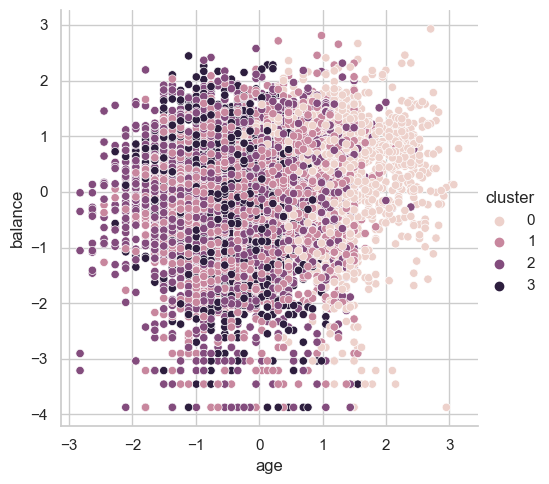

In [59]:
#Performing KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=30, max_iter=100, random_state=0)
clusters = kmeans.fit_predict(segment_df)
segment_df['cluster'] = clusters
sns.relplot(x='age', y='balance', hue='cluster', data=segment_df)

Since, we are plotting a multi-dimensional feature space in 2D, we are seeing an overlap of clusters. In order to interpret the clusters, we will reload the original data and add the clusters with the reloaded data

In [60]:
reload_df = pd.read_csv('bank.csv')
reload_df = reload_df.iloc[:,:6]
reload_df = reload_df.drop(columns='default')
reload_df = reload_df[reload_df['balance'] > 0]
reload_df = reload_df.drop_duplicates()
reload_df['cluster'] = clusters
groups = reload_df.groupby(['cluster', 'job', 'marital', 'education']).agg(['median', 'sum', 'count']).round()
groups['pct_total'] = (groups['balance']['sum'] / groups['balance']['sum'].sum()).round(3)*100

In [61]:
top = groups.sort_values(by='pct_total', ascending=False)
top.head(60)

age              balance           \
                                         median    sum count  median      sum   
cluster job           marital  education                                        
3       management    single   tertiary    32.0  20460   617   876.0  1275693   
                      married  tertiary    36.0  23711   637   659.0  1038894   
2       technician    married  secondary   41.0  21146   502   777.0   949529   
0       management    married  tertiary    54.0  14132   261  1612.0   868081   
1       blue-collar   married  secondary   39.0  24013   598   700.0   830479   
                               primary     43.0  18363   423   630.0   733301   
0       retired       married  secondary   61.0  12511   196  1495.0   609640   
1       admin.        married  secondary   41.0  17901   430   710.0   617538   
2       technician    single   secondary   32.0  11838   355   598.0   500731   
                               tertiary    32.0   6780   205   910.0   440540   
1       admin.        single   secondary   33.0  10804   310   593.0   442236   
2       services      married  secondary   38.0  12853   328   640.0   429121   
0       retired       married  primary     66.0  10799   161  1430.0   377148   
2       technician    married  tertiary    38.0   7286   181   841.0   355515   
1       blue-collar   single   secondary   30.0   7776   247   535.0   304637   
0       management    divorced tertiary    52.0   5410   104  1300.0   279698   
        retired       married  tertiary    64.0   4814    74  1960.0   218459   
1       entrepreneur  married  tertiary    40.0   3088    72   920.0   227445   
2       services      single   secondary   31.0   6469   204   458.0   212048   
        student       single   secondary   25.0   3697   147   493.0   199682   
3       self-employed single   tertiary    31.0   2843    90   865.0   167886   
2       technician    divorced secondary   42.0   5234   122   492.0   159297   
1       entrepreneur  married  secondary   42.0   3367    79   692.0   152063   
0       retired       divorced primary     73.0   4066    57   695.0   145791   
2       unemployed    married  secondary   45.0   4237    95   926.0   143039   
1       admin.        divorced secondary   42.0   5242   121   592.0   141561   
2       student       single   tertiary    27.0   1718    62   883.0   129172   
1       blue-collar   single   primary     33.0   2829    79   566.0   123429   
0       management    married  secondary   53.0   3236    61  1134.0   122456   
1       admin.        single   tertiary    32.0   2259    71   689.0   106876   
0       housemaid     married  primary     54.0   3576    66   622.0   104339   
3       management    divorced tertiary    37.0   3611    98   484.0   118060   
0       self-employed married  secondary   47.0   2056    43  1138.0   114758   
3       management    married  secondary   36.0   2397    66   565.0   104031   
0       management    married  primary     48.0   2355    48   799.0   102096   
        retired       divorced secondary   60.0   3128    49  1080.0    95476   
2       services      married  primary     46.0   1853    40   927.0    80679   
        student       single   unknown     25.0   1553    58   767.0    84126   
0       management    married  unknown     54.0   1758    32  2240.0    82267   
2       technician    single   unknown     40.0    526    14   467.0    79851   
1       blue-collar   divorced secondary   40.0   1941    46   745.0    71599   
2       unemployed    single   tertiary    33.0   1557    45   983.0    72060   
0       self-employed married  tertiary    53.0   1831    34  1104.0    75818   
2       unknown       married  unknown     52.0   1384    26  1206.0    71839   
3       self-employed married  tertiary    32.0   1394    42  1156.0    76655   
1       blue-collar   married  unknown     45.0   2412    53   732.0    86561   
        admin.        married  tertiary    35.0   2317    62   339.0    825

#### Clustering Inference
- Cluster 3 is made up of highly educated people in their 30s from management/self-employed backgrounds. They give the bulk of the total balance.
- Cluster 2 is made up of people with secondary educated, mostly technicians/student in their 30s and 40s
- Cluster 1 is made up of people with secondary and primary education in their late 30s to 40s from various occupations. Most of them in this cluster are single or divorced.
- Cluster 0 is made up of retired people with age above 50.They have the lowest balance on average.

In [62]:
MAIN_PATH = 'D:/Applied Machine Learning/Project'
df = pd.read_csv(MAIN_PATH +'/bank.csv')
term_deposits = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [63]:
#Preprocessing Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 


#To drop the column poutocme
class poutcomedropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X.drop(['poutcome'], axis = 1)

#To encode certain attributes 
class MonthEncode(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        d={"may":5,"jun":6,"jul":7,"aug":8,"oct":10,"nov":11,"dec":12,"jan":1,"feb":2,"mar":3,"apr":4,"sep":9}
        X['month']=X['month'].map(d)
        for col in X.columns:
            if X[col].dtype=='object': 
                lbl = preprocessing.LabelEncoder()
                lbl.fit(list(X[col].values))
                X[col] = lbl.transform(list(X[col].values))
        return X
    
class EdEncode(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        d={"secondary":2,"tertiary":3,"primary":1,"unknown":np.nan}
        X['education']=X['education'].map(d)
        for col in X.columns:
            if X[col].dtype=='object': 
                lbl = preprocessing.LabelEncoder()
                lbl.fit(list(X[col].values))
                X[col] = lbl.transform(list(X[col].values))
        
        return X

#To impute unknown values in the attribute Educaiton with the mode   
class EdIMputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy = 'mode')
        X['Education'] = imputer.fit_transform(X[['Education']])
        return X
    
    
    
    
pipeline = Pipeline([("pout", poutcomedropper()), 
                    ("month", MonthEncode()),
                    ("ED", EdEncode()),
                    ("EdIm", EdIMputer())])

s = pipeline.fit_transform(df)


In [64]:
df2 = pd.DataFrame(df)
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
